In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfecte

In [32]:
import os
import cv2
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow.keras.layers as k
from PIL import Image
from tqdm.notebook import tqdm
from tensorflow import keras
from tensorflow.keras import Sequential
from keras import callbacks

from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, Callback, CallbackList
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

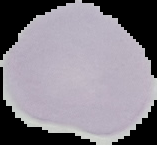

In [33]:
load_img('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png')

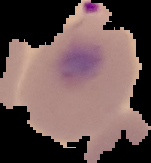

In [41]:
load_img('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C48P9thinF_IMG_20150721_162732_cell_21.png')

In [42]:
image_dir = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/'
size = 128
dataset = []
label = []

In [43]:
parasitized_img = os.listdir(image_dir + 'Parasitized/')

for i, img_name in enumerate(tqdm(parasitized_img)):
    
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + 'Parasitized/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        
        dataset.append(np.array(image))
        label.append(0)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [44]:
uninfected_img = os.listdir(image_dir + 'Uninfected/')

for i, img_name in enumerate(tqdm(uninfected_img)):
    
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + 'Uninfected/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        
        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2, random_state = 0)

In [55]:
len(xtrain)


22046

In [56]:
len(xtest)


5512

In [57]:
Input_shape = (size, size, 3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

flat = k.Flatten()(drop2)

hidden1 = k.Dense(512, activation = 'relu')(flat)
norm3 = k.BatchNormalization(axis = -1)(hidden1)
drop3 = k.Dropout(rate = 0.2)(norm3)

hidden2 = k.Dense(256, activation = 'relu')(hidden1)
norm4 = k.BatchNormalization(axis = -1)(hidden2)
drop4 = k.Dropout(rate = 0.2)(norm4)

out = k.Dense(2, activation = 'sigmoid')(drop4)

In [58]:
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [59]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0     

In [60]:
filepath="malaria_detect.h5"
checkpoint_1 = callbacks.ModelCheckpoint(filepath, monitor= 'val_loss',save_best_only=True, mode='min',verbose=1)
checkpoint_2 = callbacks.ModelCheckpoint(filepath, monitor= 'val_accuracy',save_best_only=True, mode='max',verbose=1)

callbacks_list = [checkpoint_1, checkpoint_2]

In [61]:
history = model.fit(x=np.array(xtrain), y=ytrain,
                   batch_size = 64, verbose = 1, epochs = 25,
                   validation_split = 0.1, shuffle = False, callbacks=callbacks_list)

2023-01-30 13:36:50.882927: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 975224832 exceeds 10% of free system memory.
2023-01-30 13:36:51.999652: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 975224832 exceeds 10% of free system memory.


Epoch 1/25
311/311 [==============================] - 10s 29ms/step - loss: 0.6024 - accuracy: 0.6994 - val_loss: 2.3187 - val_accuracy: 0.5524

Epoch 00001: val_loss improved from inf to 2.31873, saving model to malaria_detect.h5

Epoch 00001: val_accuracy improved from -inf to 0.55238, saving model to malaria_detect.h5
Epoch 2/25
311/311 [==============================] - 8s 26ms/step - loss: 0.2634 - accuracy: 0.9024 - val_loss: 0.2421 - val_accuracy: 0.9152

Epoch 00002: val_loss improved from 2.31873 to 0.24214, saving model to malaria_detect.h5

Epoch 00002: val_accuracy improved from 0.55238 to 0.91519, saving model to malaria_detect.h5
Epoch 3/25
311/311 [==============================] - 8s 26ms/step - loss: 0.2046 - accuracy: 0.9282 - val_loss: 0.2713 - val_accuracy: 0.9302

Epoch 00003: val_loss did not improve from 0.24214

Epoch 00003: val_accuracy improved from 0.91519 to 0.93016, saving model to malaria_detect.h5
Epoch 4/25
311/311 [==============================] - 8s 2

In [62]:
print('Test Accuracy : {:.2f}%'.format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

173/173 [==============================] - 1s 5ms/step - loss: 0.4819 - accuracy: 0.9370
Test Accuracy : 93.70%


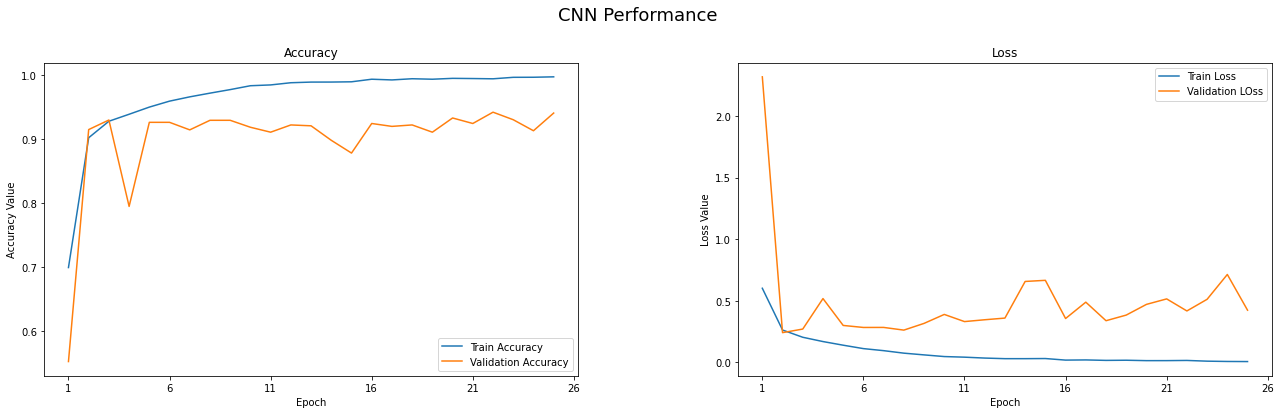

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6)) 
t = f.suptitle('CNN Performance', fontsize=18) 
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1 
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label = 'Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch + 1, 5)) 
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list, history.history['loss'], label = 'Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label = 'Validation LOss')
ax2.set_xticks(np.arange(1, max_epoch + 1, 5)) 
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss')
l2 = ax2.legend(loc = "best")